**theortical**


Q.1 What is K-Nearest Neighbors (KNN) and how does it work?

KNN is a lazy learning algorithm used for classification and regression. It works by finding the K closest data points to a given input based on a distance metric (like Euclidean distance) and making predictions based on these neighbors.

For classification: The most frequent class among the neighbors is assigned.

For regression: The average value of the neighbors is taken.

Q.2 What is the difference between KNN Classification and KNN Regression?

KNN Classification: Predicts the class label based on the majority vote of the K nearest neighbors.
KNN Regression: Predicts a continuous value by averaging the target values of the K nearest neighbors.

Q.3 What is the role of the distance metric in KNN?

The distance metric determines how similarity between data points is measured. Common metrics include:
Euclidean Distance (most common)
Manhattan Distance
Minkowski Distance
Cosine Similarity

Q.4 What is the Curse of Dimensionality in KNN?

As the number of features increases, the distance between data points becomes less meaningful, making it harder for KNN to distinguish between classes. This reduces the algorithm’s performance in high-dimensional spaces.

Q.5 How can we choose the best value of K in KNN?

Use techniques like cross-validation to test different K values.
Typically, choose K as an odd number to avoid ties in classification.
Small K → Sensitive to noise.
Large K → Smoother predictions but may overlook local patterns.

Q.6 What are KD Tree and Ball Tree in KNN?

KD Tree: A binary tree that splits data along the median of each dimension. Efficient in low-dimensional spaces.

Ball Tree: Divides data into nested hyperspheres (balls), better for high-dimensional datasets.

Q.7 When should you use KD Tree vs. Ball Tree?

KD Tree: Suitable for datasets with low to moderate dimensions (up to 20 features).
Ball Tree: More efficient for high-dimensional datasets.


Q.8 What are the disadvantages of KNN?

Computationally expensive during prediction (needs to compute distances to all points).
Sensitive to irrelevant features and noisy data.
Poor performance with high-dimensional data (curse of dimensionality).

Q.9 How does feature scaling affect KNN?

Feature scaling (e.g., Min-Max or Standardization) is crucial because KNN relies on distance calculations. Without scaling, features with larger ranges dominate the distance metric.

Q.10 How does KNN handle missing values in a dataset?

Imputation (replace missing values with mean/median).
KNN Imputation: Use KNN itself to predict missing values based on nearby neighbors.
Removing samples or features with too many missing values.

Q.11 What is PCA (Principal Component Analysis)?

PCA is a dimensionality reduction technique that transforms data into a new coordinate system. It projects the data onto the axes (principal components) that maximize variance.


Q.12 How does PCA work?

Step 1: Standardize the data.
Step 2: Compute the covariance matrix.
Step 3: Calculate eigenvectors and eigenvalues.
Step 4: Project the data onto the principal components.

q.13 What is the geometric intuition behind PCA?

PCA finds the directions (principal components) along which the data varies the most. Imagine data points as clouds in 3D space—PCA finds the line or plane where the cloud stretches the most.

Q.14 What is the difference between Feature Selection and Feature Extraction?

Feature Selection: Chooses the most important features from the original data.
Feature Extraction: Transforms data into new features (like PCA does).

q.15 What are Eigenvalues and Eigenvectors in PCA?

Eigenvectors: Indicate the direction of maximum variance (principal components).
Eigenvalues: Represent the magnitude of variance captured by each eigenvector.

Q.16 How do you decide the number of components to keep in PCA?

Explained Variance Ratio: Choose components that explain a high percentage (e.g., 95%) of the variance.
Scree Plot: Visualize the eigenvalues and look for the "elbow" point.


Q.17 Can PCA be used for classification?

PCA itself is not a classifier but can be used before classification to reduce dimensionality, making models faster and less prone to overfitting.


q.18 What are the limitations of PCA?

Linear Assumption: PCA assumes linear relationships.
Sensitive to Scaling: Requires feature scaling.
Loss of Interpretability: Transformed features may be hard to interpret.

Q.19 How do KNN and PCA complement each other?

PCA reduces dimensionality, making KNN faster and more efficient.
Reducing noise and irrelevant features helps KNN perform better.

Q.20 How does KNN handle missing values in a dataset?
(Already covered in KNN section above.)

Q.21What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

PCA: Unsupervised, focuses on variance.
LDA: Supervised, focuses on maximizing class separability.
PCA is used for feature reduction, while LDA is used for classification tasks.

**practical**


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create a synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15.0, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Regressor with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 437.35


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN classifiers with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Train and evaluate the model using Euclidean distance
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Train and evaluate the model using Manhattan distance
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Print the results
print(f"Accuracy with Euclidean distance: {accuracy_euclidean:.2f}")
print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.2f}")


Accuracy with Euclidean distance: 1.00
Accuracy with Manhattan distance: 1.00


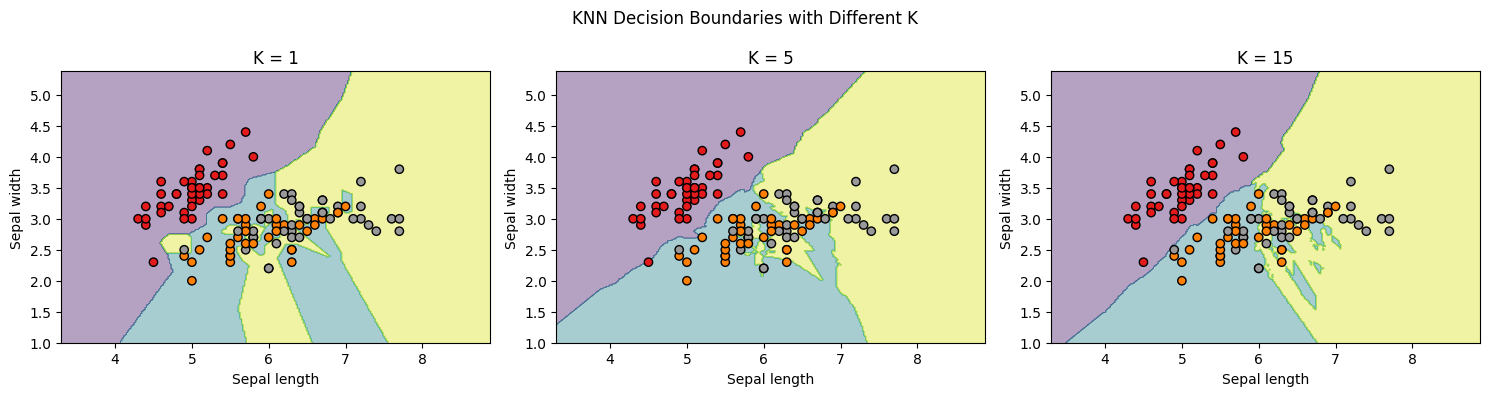

In [6]:
#q.4 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset and use only the first two features for 2D visualization
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length and sepal width
y = iris.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the mesh grid for plotting
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Try different values of K
k_values = [1, 5, 15]
plt.figure(figsize=(15, 4))

for i, k in enumerate(k_values):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Predict for each point in mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, len(k_values), i + 1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Set1)
    plt.title(f'K = {k}')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

plt.suptitle("KNN Decision Boundaries with Different K")
plt.tight_layout()
plt.show()


In [7]:
#q.5 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- KNN on Unscaled Data ----------
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# ---------- KNN on Scaled Data ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# ---------- Results ----------
print(f"Accuracy without Scaling: {acc_unscaled:.2f}")
print(f"Accuracy with Scaling   : {acc_scaled:.2f}")


Accuracy without Scaling: 1.00
Accuracy with Scaling   : 1.00


Principal Component 1: 0.4206 variance explained
Principal Component 2: 0.2200 variance explained
Principal Component 3: 0.1362 variance explained
Principal Component 4: 0.1239 variance explained
Principal Component 5: 0.0993 variance explained


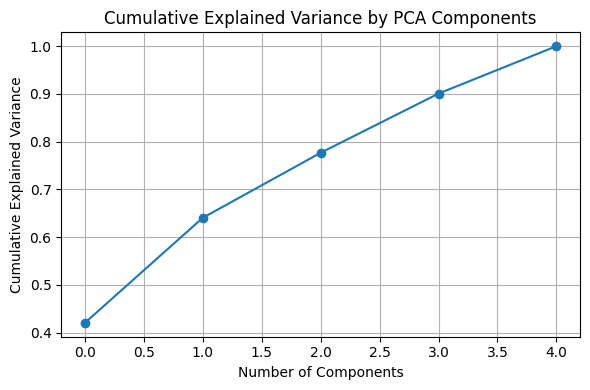

In [8]:
#q.6 
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic data with 5 features
X, _ = make_classification(n_samples=300, n_features=5, n_informative=3, n_redundant=0, random_state=42)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_

for i, ratio in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {ratio:.4f} variance explained")

# Optional: Plot the explained variance ratio
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
#q.7 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---------- KNN without PCA ----------
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# ---------- Apply PCA (retain 2 components) ----------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# ---------- KNN with PCA ----------
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# ---------- Results ----------
print(f"Accuracy without PCA: {acc_original:.2f}")
print(f"Accuracy with PCA   : {acc_pca:.2f}")


Accuracy without PCA: 1.00
Accuracy with PCA   : 0.93


In [10]:
#q.8 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Predict and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output best params and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Test Set Accuracy: {accuracy:.2f}")


Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Test Set Accuracy: 1.00


In [11]:
#q.9 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate number of misclassified samples
misclassified = (y_pred != y_test).sum()

# Print results
print(f"Number of misclassified samples: {misclassified}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Number of misclassified samples: 0
Accuracy: 1.00


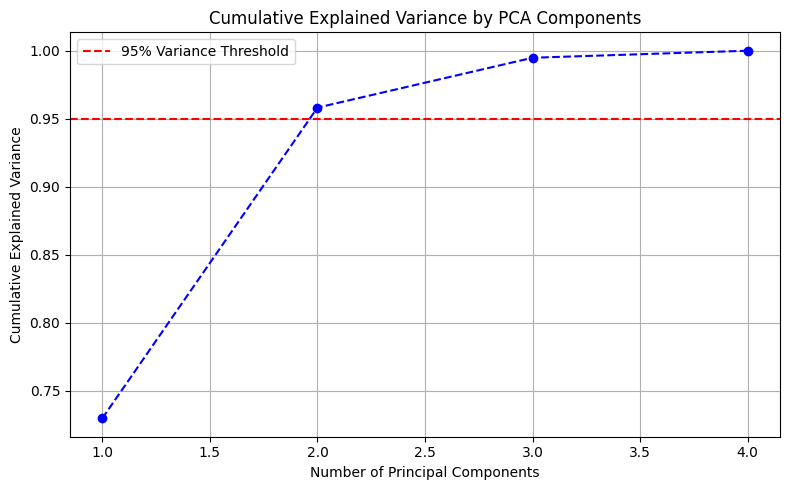

In [12]:
#q.10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()




In [13]:
#q.11
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and scale the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
acc_uniform = accuracy_score(y_test, y_pred_uniform)

# Train KNN with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
acc_distance = accuracy_score(y_test, y_pred_distance)

# Compare results
print(f"Accuracy with 'uniform' weights : {acc_uniform:.2f}")
print(f"Accuracy with 'distance' weights: {acc_distance:.2f}")


Accuracy with 'uniform' weights : 1.00
Accuracy with 'distance' weights: 1.00


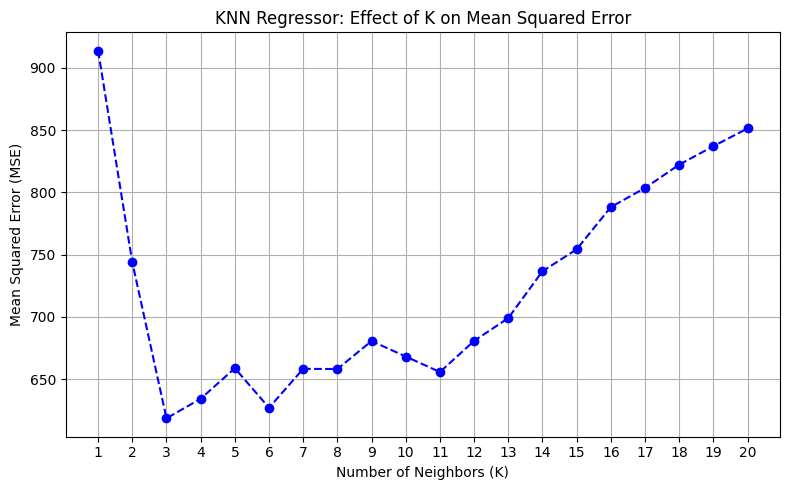

In [14]:
#q.12
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=1, noise=20.0, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Test different values of K
k_values = range(1, 21)
mse_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot MSE vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o', linestyle='--', color='blue')
plt.title('KNN Regressor: Effect of K on Mean Squared Error')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
#q.13
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create a sample dataset with missing values
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [2, 4, 6, np.nan, 10],
    'Feature3': [5, np.nan, np.nan, 8, 10]
}

df = pd.DataFrame(data)
print("Original Data with Missing Values:\n", df)

# Feature scaling (important for KNN-based imputation)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=2)
df_imputed_scaled = imputer.fit_transform(df_scaled)

# Inverse scaling to bring values back to original range
df_imputed = scaler.inverse_transform(df_imputed_scaled)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

print("\nData After KNN Imputation:\n", df_imputed.round(2))


Original Data with Missing Values:
    Feature1  Feature2  Feature3
0       1.0       2.0       5.0
1       2.0       4.0       NaN
2       NaN       6.0       NaN
3       4.0       NaN       8.0
4       5.0      10.0      10.0

Data After KNN Imputation:
    Feature1  Feature2  Feature3
0       1.0       2.0       5.0
1       2.0       4.0       6.5
2       1.5       6.0       7.5
3       4.0       7.0       8.0
4       5.0      10.0      10.0


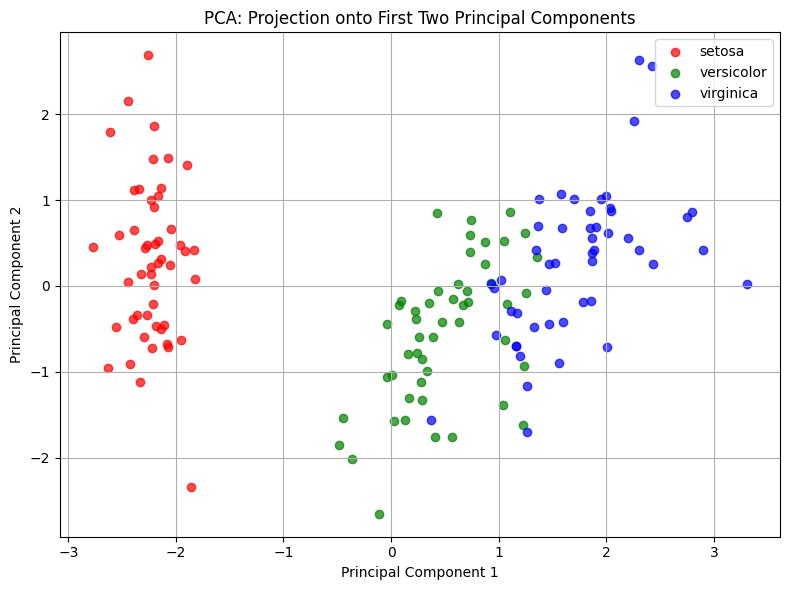

In [16]:
#q.14 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (2 components for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the projection onto the first two principal components
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.7, color=colors[i], label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Projection onto First Two Principal Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
#q.15 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Compare KD Tree and Ball Tree
algorithms = ['kd_tree', 'ball_tree']

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)

    start = time.time()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAlgorithm: {algo}")
    print(f"Accuracy : {accuracy:.2f}")
    print(f"Time Taken: {end - start:.6f} seconds")





Algorithm: kd_tree
Accuracy : 1.00
Time Taken: 0.004579 seconds

Algorithm: ball_tree
Accuracy : 1.00
Time Taken: 0.005340 seconds


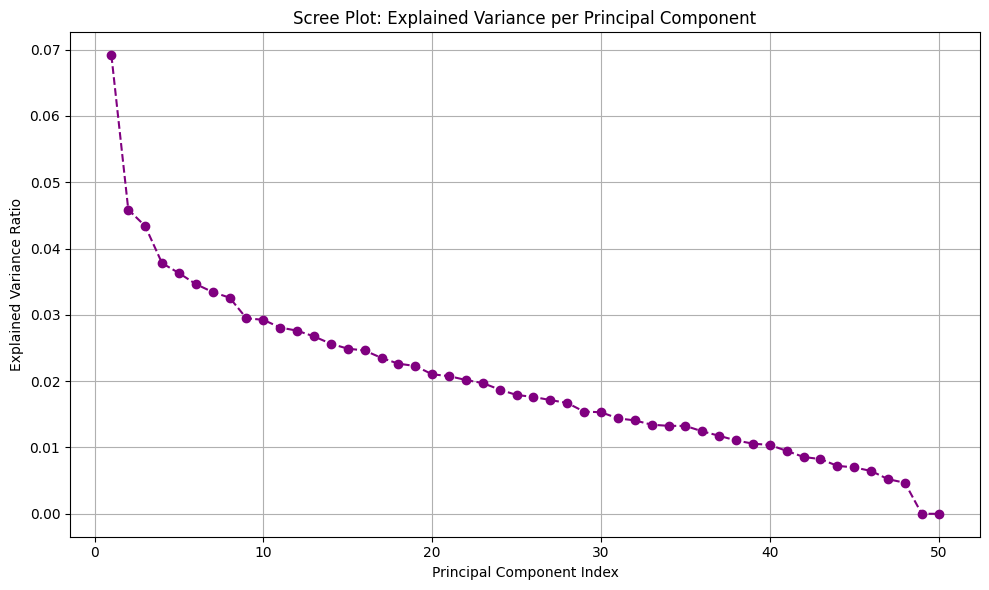

In [19]:
#q.16 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Generate high-dimensional synthetic data
X, _ = make_classification(n_samples=300, n_features=50, n_informative=20, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_

# Step 4: Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='purple')
plt.title('Scree Plot: Explained Variance per Principal Component')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
#q.17 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



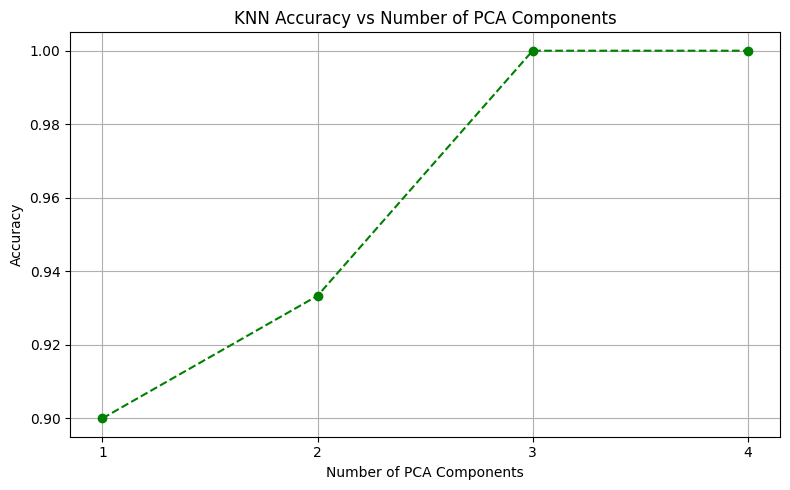

In [22]:
#q.18
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Test accuracy for different numbers of PCA components
components = range(1, X.shape[1] + 1)
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train KNN on reduced data
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs number of components
plt.figure(figsize=(8, 5))
plt.plot(components, accuracies, marker='o', linestyle='--', color='green')
plt.title('KNN Accuracy vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(components)
plt.tight_layout()
plt.show()


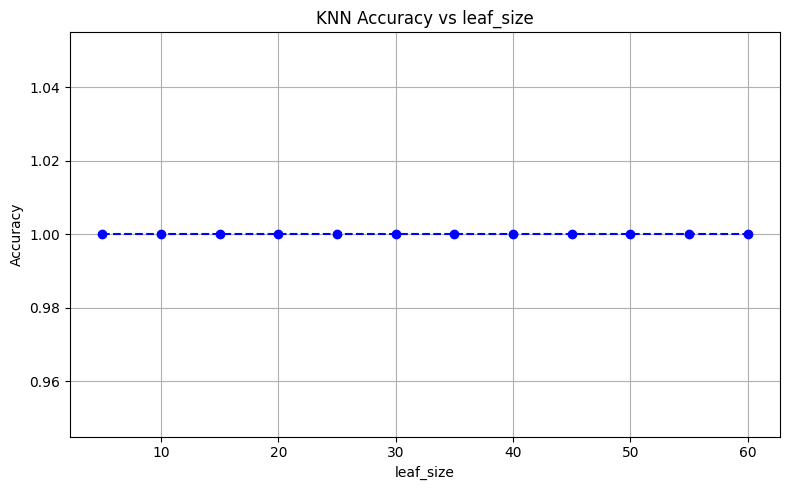

In [23]:
#q.19 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and scale the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Test various leaf_size values
leaf_sizes = range(5, 61, 5)
accuracies = []

for leaf in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=leaf)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='--', color='blue')
plt.title('KNN Accuracy vs leaf_size')
plt.xlabel('leaf_size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


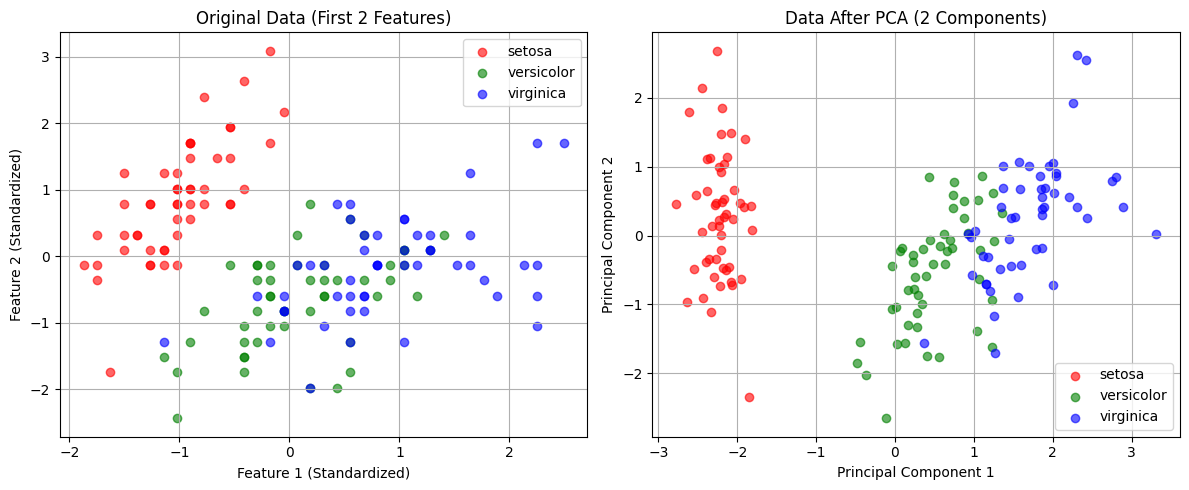

In [24]:
#Q.20
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
colors = ['red', 'green', 'blue']

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot original data (first two features)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, color in enumerate(colors):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], color=color, label=target_names[i], alpha=0.6)
plt.title("Original Data (First 2 Features)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.grid(True)

# Plot transformed data (PCA components)
plt.subplot(1, 2, 2)
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=target_names[i], alpha=0.6)
plt.title("Data After PCA (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [25]:
#q.21
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Print classification report
print("Classification Report for KNN on Wine Dataset:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report for KNN on Wine Dataset:

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



Euclidean MSE: 1328.30
Manhattan MSE: 1247.53
Chebyshev MSE: 1475.13


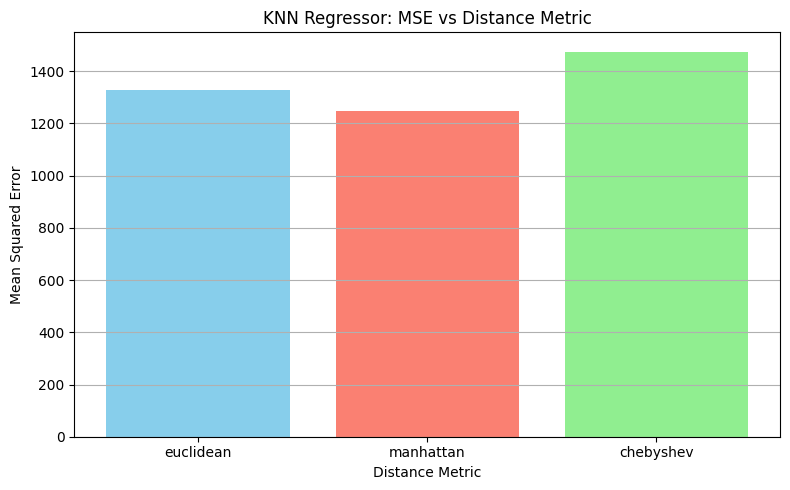

In [26]:
#Q.22
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generate synthetic regression data
X, y = make_regression(n_samples=300, n_features=5, noise=10, random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Try different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev']
mse_scores = []

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"{metric.capitalize()} MSE: {mse:.2f}")

# Step 3: Visualize the comparison
plt.figure(figsize=(8, 5))
plt.bar(metrics, mse_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('KNN Regressor: MSE vs Distance Metric')
plt.xlabel('Distance Metric')
plt.ylabel('Mean Squared Error')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [27]:
#q.23 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Load binary classification dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict probabilities
y_proba = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9817


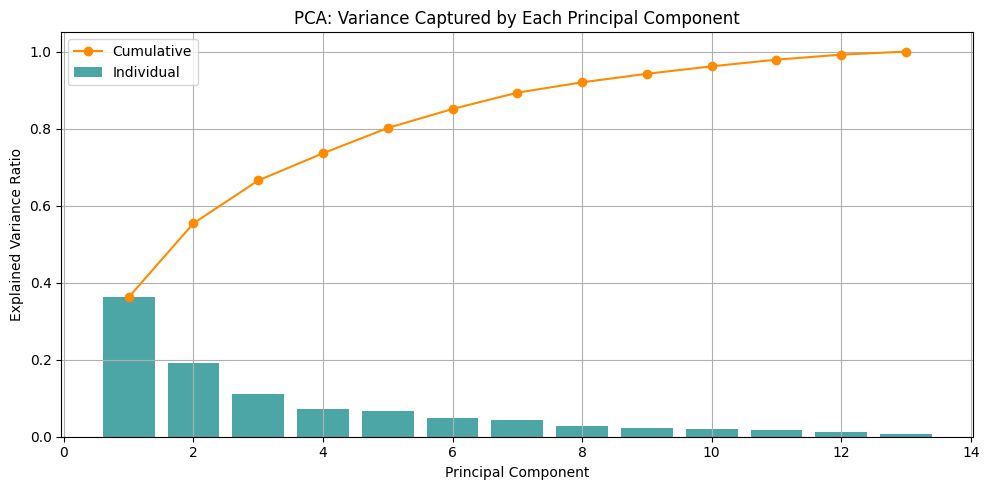

In [28]:
#Q.24 import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load dataset
data = load_wine()
X = data.data

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Plot variance explained by each component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='teal', label='Individual')
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', color='darkorange', label='Cumulative')
plt.title('PCA: Variance Captured by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
#Q.25 
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = load_wine()
X, y = data.data, data.target

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Step 5: Train KNN on selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

# Step 6: Evaluate accuracy
acc_selected = accuracy_score(y_test, y_pred)
print(f"Accuracy with feature selection: {acc_selected:.4f}")

# Optional: Compare with full feature set
knn_full = KNeighborsClassifier(n_neighbors=5)
knn_full.fit(X_train, y_train)
y_pred_full = knn_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy without feature selection: {acc_full:.4f}")


Accuracy with feature selection: 0.9722
Accuracy without feature selection: 0.9444


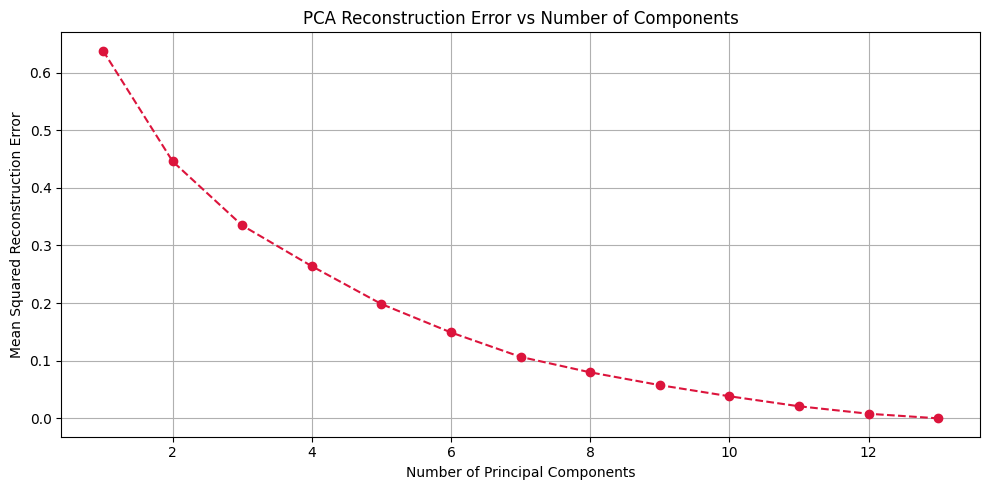

In [30]:
#Q.26 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Step 1: Load and scale data
data = load_wine()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Evaluate reconstruction error for different numbers of components
n_features = X.shape[1]
errors = []

components_range = range(1, n_features + 1)

for n in components_range:
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_reduced)
    mse = mean_squared_error(X_scaled, X_reconstructed)
    errors.append(mse)

# Step 3: Plot reconstruction error
plt.figure(figsize=(10, 5))
plt.plot(components_range, errors, marker='o', linestyle='--', color='crimson')
plt.title('PCA Reconstruction Error vs Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.grid(True)
plt.tight_layout()
plt.show()


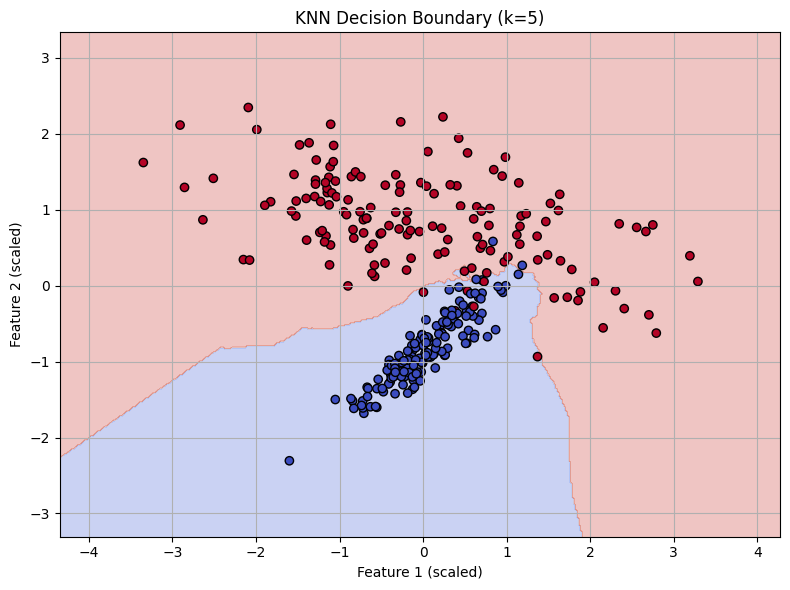

In [31]:
#Q.27 import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic 2D dataset
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Step 4: Create mesh grid for decision surface
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Step 5: Predict on mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)
plt.tight_layout()
plt.show()


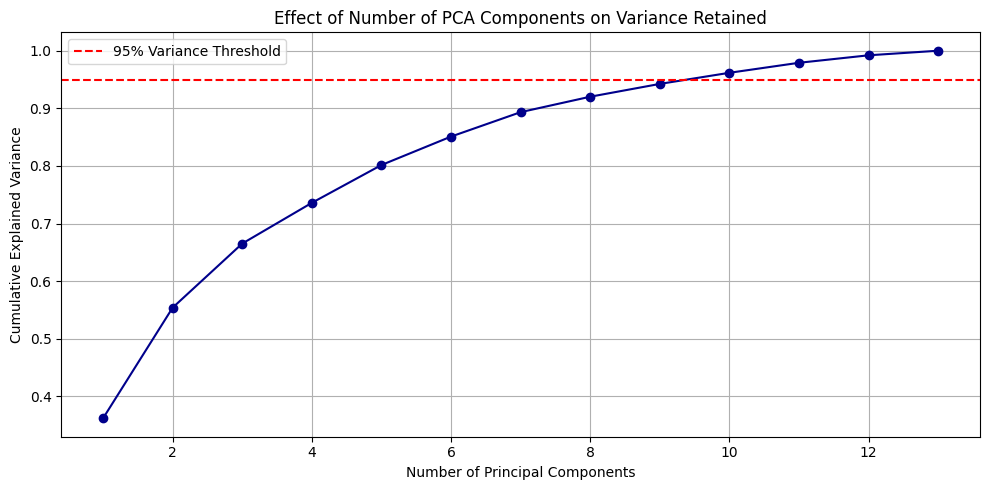

In [32]:
#Q28
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load and standardize data
data = load_wine()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 3: Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='darkblue')
plt.title('Effect of Number of PCA Components on Variance Retained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()


**THANKYOU**